In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from matplotlib.patches import Polygon
import pingouin as pg

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

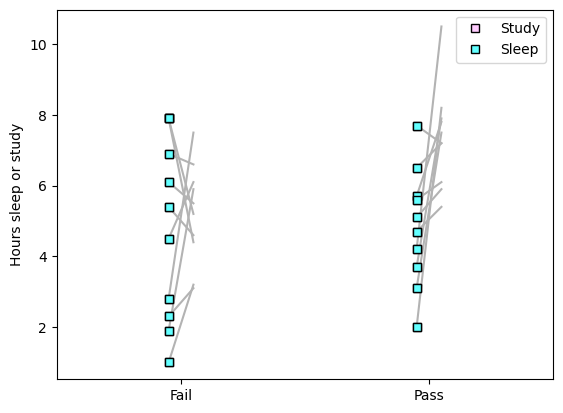

In [2]:
exam_outcome = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1];
study_hours  = [7.9, 7.9, 2.8, 5.4, 6.1, 4.5, 6.9, 2.3, 1.9, 1, 3.1, 5.7, 5.6, 4.7, 4.2, 2, 7.7, 6.5, 5.1, 3.7]
sleep_hours  = [4.4, 5.2, 7.5, 4.6, 5.5, 6.1, 6.6, 3.1, 5.9, 3.2, 7.5, 7.8, 6.1, 5.4, 10.5, 8.2, 7.2, 7.2, 5.9, 7.9]

n = len(exam_outcome)


for i in range(n):
    plt.plot([exam_outcome[i]-.05, exam_outcome[i]+.05],[study_hours[i],sleep_hours[i]],color=[.7,.7,.7])
    

plt.plot(exam_outcome-.05*np.ones(n),study_hours,'ks',markerfacecolor=[1,.8,1],label='Study')
plt.plot(exam_outcome-.05*np.ones(n),study_hours,'ks',markerfacecolor=[.39,1,1],label='Sleep')

plt.xticks([0,1],labels=('Fail','Pass'))
plt.xlim([-.5,1.5])
plt.ylabel('Hours sleep or study')
plt.legend()
plt.show()

In [7]:
logregmodel = LogisticRegression(solver='newton-cg')

desmat = np.vstack((study_hours,sleep_hours)).T

logregmodel.fit(desmat,np.array(exam_outcome))

print(logregmodel.intercept_)
print(logregmodel.coef_)

[-7.1649154]
[[0.10794965 1.05178489]]


In [8]:
predvals = logregmodel.predict(desmat)
predvalsP = logregmodel.predict_proba(desmat)

print(predvals)
print(np.array(exam_outcome))

print(predvalsP)

logregmodel.score(desmat,np.array(exam_outcome))

[0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[[0.84346776 0.15653224]
 [0.69906128 0.30093872]
 [0.26391272 0.73608728]
 [0.85116615 0.14883385]
 [0.67296049 0.32703951]
 [0.56543607 0.43456393]
 [0.37245072 0.62754928]
 [0.97481743 0.02518257]
 [0.68011062 0.31988938]
 [0.9756662  0.0243338 ]
 [0.25766981 0.74233019]
 [0.16052598 0.83947402]
 [0.53606465 0.46393535]
 [0.72669404 0.27330596]
 [0.01296804 0.98703196]
 [0.15767633 0.84232367]
 [0.22458431 0.77541569]
 [0.24794388 0.75205612]
 [0.60081002 0.39918998]
 [0.17601271 0.82398729]]


0.75

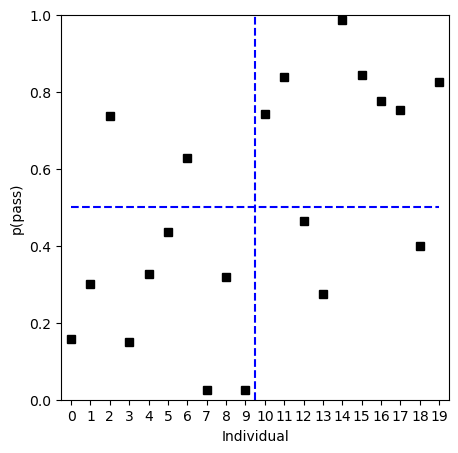

In [9]:
fig,ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(predvalsP[:,1],'ks')
ax.plot([0,19],[.5,.5],'b--')
ax.plot([9.5,9.5],[0,1],'b--')

ax.set_xticks(np.arange(20))
ax.set_xlabel('Individual')
ax.set_ylabel('p(pass)')
ax.set_xlim([-.5, 19.5])
ax.set_ylim([0,1])
plt.show()